In [5]:
import numpy
import pandas
from numpy import matrix, linalg, linspace, interp, asarray, argmax
from scipy.integrate import odeint
from scipy.stats import linregress 
import matplotlib.pyplot as plt
%matplotlib inline

FLOW BALANCE:

1)r0 = (1+alpha)r1 + r2

2)r2 = r3 + r4

3)r3 = r6 + r7 + r8

Stoichiometric equations:

4)r4 = (3/4)r5

5)r8 = (2/3)r3

NADH Balance:

6)beta*r1 + (1/3)r2 - (1/2)r5 + r7 = 0

ATP Balance:

7)-gamma*r1 + (1/3)r3 + (1/3)r4 + (1/6)r5 + (1/2)r8 = 0

Basis:

8)r1 = mu = 0.15

Specification:

9) r6 = 0

In [6]:
def response_fun(C):
    if C[1]<=0:               # glucose concentration
        return [0,0,0,0,0]      # all zero rates when there is no glucose
            
    else:
        mu, theta= 0.15, 0.10
                
        import pandas, numpy
        S = numpy.matrix(pandas.read_excel('Tut8eqOWN.xlsx'))
        S1 = numpy.vstack([S,[0,1,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0]]) # Adding mu and zero PFL spec.

        K = numpy.matrix([0, 0, 0, 0, 0, 0, theta, mu, 0]).T
        r = numpy.linalg.solve(S1, K) 
        
    
        return [r[1,0],   # important to see the order of the rates (X,S,SA,F,A)
               -r[0,0],   # glucose, note the negative since the flux model calculated (-rs)
                r[5,0],   # Succinic acid
                r[6,0],   # Fumarate
                r[8,0]]   # Acetic Acid

In [7]:
def ferm_eq(C,t):
    Cx, Cs, Csa, Cf, Ca = C[0],C[1],C[2],C[3],C[4]  # order of components very important 
    r=response_fun([Cx, Cs, Csa, Cf, Ca])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx,
            r[1]*Cx,    
            r[2]*Cx,
            r[3]*Cx,
            r[4]*Cx]

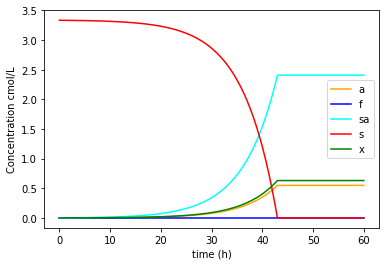

In [8]:
Co=[0.001, 100/30,0,0,0]                   # [Cxo, Cso, Csao, Cfo, Cao] in cmol/L
tmax=60                                 # Integrate for 20 hours  
tspan=numpy.linspace(0,tmax,500)           # define the timespan of the integration
C = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls upon ferm_eq

Cx, Cs, Csa, Cf, Ca = C.T

plt.plot(tspan, Ca, color='orange', label='a')
plt.plot(tspan, Cf, color='blue', label='f')
plt.plot(tspan, Csa, color='cyan', label='sa')
plt.plot(tspan, Cs, color='red',label='s')
plt.plot(tspan, Cx, color='green',label='x')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()
